In [2]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Provide the full path to your .mat file
mat_file_path = r'C:\Users\Valerie\Documents\Kuliah\Sispenpol\PCA\PCA Lab Data\HHT_data_L1R0.mat'

# Load the .mat file
dataL1R0 = loadmat(mat_file_path)

In [4]:
mat_file_path = r'C:\Users\Valerie\Documents\Kuliah\Sispenpol\PCA\PCA Lab Data\HHT_data_L1R1.mat'

# Load the .mat file
dataL1R1 = loadmat(mat_file_path)

In [5]:
L1R0_data = dataL1R0['HHT_data_L1R0']  
L1R1_data = dataL1R1['HHT_data_L1R1']

merged_matrix = np.concatenate((L1R0_data, L1R1_data), axis=0)

In [6]:
print(len(L1R0_data))
print(len(L1R1_data))
print(len(merged_matrix))


250
250
500


In [7]:
print(len(merged_matrix))
jumlah_kolom = merged_matrix.shape[1]
print(jumlah_kolom)

500
27


In [8]:
n_components = 3
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(merged_matrix)

pc_columns = [f'PC{i+1}' for i in range(n_components)]
score_values = pd.DataFrame(data=principal_components, columns=pc_columns)

# Print the score values
print(score_values)

          PC1       PC2       PC3
0    0.995587 -2.057976  0.100824
1    1.483479  0.386640 -0.812083
2    1.774277  0.261472 -0.958495
3    1.543548  0.317068 -0.278356
4    1.200983 -2.383774 -0.584606
..        ...       ...       ...
495  1.814364  2.321333 -1.039403
496  0.829115  4.026293 -0.858496
497  0.664522  2.385349 -0.862571
498  0.401767  2.276610 -0.627225
499 -0.767810  1.868284  0.921164

[500 rows x 3 columns]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


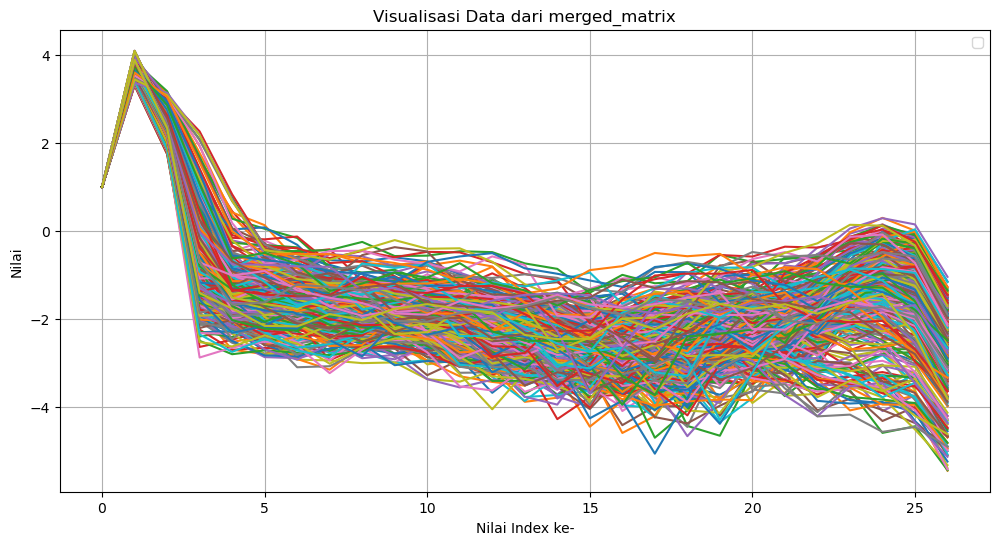

In [9]:
plt.figure(figsize=(12, 6))
for row_index in range (1,len(merged_matrix)):
    plt.plot(range(jumlah_kolom), merged_matrix[row_index])
plt.ylabel('Nilai')
plt.xlabel('Nilai Index ke-')
plt.title('Visualisasi Data dari merged_matrix')
plt.legend()
plt.grid(True)
plt.show()

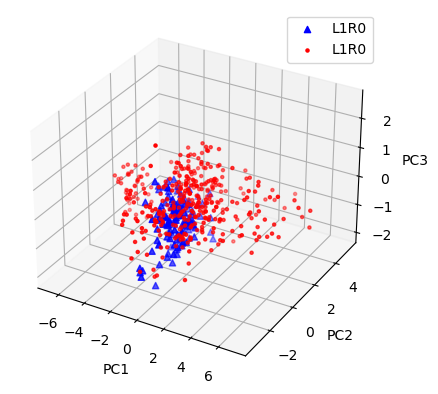

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for L1R0
ax.scatter(score_values['PC1'][:125], score_values['PC2'][:125], score_values['PC3'][:125], marker='^', c='blue', label='L1R0')
ax.scatter(score_values['PC1'][125:], score_values['PC2'][125:], score_values['PC3'][125:], marker='.', c='red', label='L1R0')

# Set labels and legend
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()

# Show the plot
plt.show()